In [827]:
try:
    import numpy as np
    from matplotlib import pyplot as plt
    import scipy as sp
    from scipy.signal import freqz
except:
    %pip install numpy
    %pip install matplotlib
    %pip install scipy
    import numpy as np
    import scipy as sp
    from matplotlib import pyplot as plt

In [828]:
Ts = 1e-6
OSR = 8 #Oversample Rate 20x
B = 0.5/Ts
t0 = Ts/OSR
alpha = (Ts*np.sqrt(np.log(2)))/(np.sqrt(2)*B*Ts)
hmax = np.sqrt(np.pi)/alpha
hmax,alpha

(np.float64(1505383.695578505), np.float64(1.1774100225154745e-06))

In [829]:
f = np.linspace(-1/Ts,1/Ts,100)
f

array([-1000000.        ,  -979797.97979798,  -959595.95959596,
        -939393.93939394,  -919191.91919192,  -898989.8989899 ,
        -878787.87878788,  -858585.85858586,  -838383.83838384,
        -818181.81818182,  -797979.7979798 ,  -777777.77777778,
        -757575.75757576,  -737373.73737374,  -717171.71717172,
        -696969.6969697 ,  -676767.67676768,  -656565.65656566,
        -636363.63636364,  -616161.61616162,  -595959.5959596 ,
        -575757.57575758,  -555555.55555556,  -535353.53535354,
        -515151.51515152,  -494949.49494949,  -474747.47474747,
        -454545.45454545,  -434343.43434343,  -414141.41414141,
        -393939.39393939,  -373737.37373737,  -353535.35353535,
        -333333.33333333,  -313131.31313131,  -292929.29292929,
        -272727.27272727,  -252525.25252525,  -232323.23232323,
        -212121.21212121,  -191919.19191919,  -171717.17171717,
        -151515.15151515,  -131313.13131313,  -111111.11111111,
         -90909.09090909,   -70707.07070

In [830]:
# alpha2 = (np.sqrt(np.log(2))/np.sqrt(2)) * Ts/(B*Ts)
# hmax = np.sqrt(np.pi)/alpha2
# k = np.linspace(-1/2, 1/2, 1 * 28 + 1)
# exph = ((np.sqrt(2)*np.pi / np.sqrt(np.log(2))) * B*Ts * (k/OSR))

In [831]:
# def gaussdesign(bt, span, SpS):
#     T = 1
#     # alpha = np.sqrt(2) / (bt * T)
#     alpha = (np.sqrt(np.log(2))/np.sqrt(2)) * T/bt
#     t = np.linspace(-span/2, span/2, span * SpS + 1)
#     g = np.exp(- (alpha ** 2) * (t**2))
#     return g/np.sum(g)

In [832]:
# h = gaussdesign(0.5, 1, 28)
# print(f"{h[0]:.4f}")

In [833]:
# plt.stem(gaussdesign(0.3, 4, 8), basefmt=" ")

In [834]:
# len(gaussdesign(0.5, 1, 28))

In [835]:
# h = h/h.max()
# w, heq = freqz(h, a=1, worN=28, fs=1/Ts)

# h_dB = 20*np.log10(abs(heq))

# plt.plot(h_dB)

In [836]:
print(f"{hmax/1e6:.4f} MHz")

1.5054 MHz


(-28.0, 28.0)

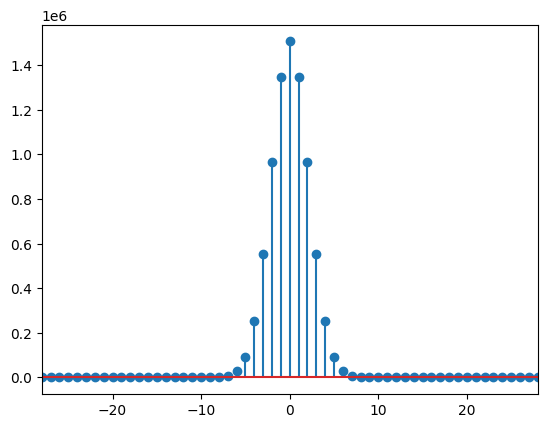

In [837]:
start = -28
stop = 28


hmax = np.sqrt(np.pi)/alpha
h_discreto = lambda k: hmax*np.exp(-((np.pi/alpha)*t0*(k))**2)
k = np.arange(start,stop+1,1)
plt.stem(k,h_discreto(k))
plt.xlim(start,stop)

In [838]:
h_discreto(k)

array([2.00261080e-32, 9.09321491e-30, 3.30533725e-27, 9.61814946e-25,
       2.24049865e-22, 4.17806580e-20, 6.23710829e-18, 7.45364519e-16,
       7.13069020e-14, 5.46099581e-12, 3.34803154e-10, 1.64317818e-08,
       6.45590601e-07, 2.03051948e-05, 5.11251441e-04, 1.03047949e-02,
       1.66272941e-01, 2.14773763e+00, 2.22084525e+01, 1.83836944e+02,
       1.21821714e+03, 6.46240307e+03, 2.74435823e+04, 9.32964203e+04,
       2.53902269e+05, 5.53153425e+05, 9.64721709e+05, 1.34690176e+06,
       1.50538370e+06, 1.34690176e+06, 9.64721709e+05, 5.53153425e+05,
       2.53902269e+05, 9.32964203e+04, 2.74435823e+04, 6.46240307e+03,
       1.21821714e+03, 1.83836944e+02, 2.22084525e+01, 2.14773763e+00,
       1.66272941e-01, 1.03047949e-02, 5.11251441e-04, 2.03051948e-05,
       6.45590601e-07, 1.64317818e-08, 3.34803154e-10, 5.46099581e-12,
       7.13069020e-14, 7.45364519e-16, 6.23710829e-18, 4.17806580e-20,
       2.24049865e-22, 9.61814946e-25, 3.30533725e-27, 9.09321491e-30,
      

In [839]:
f,H = freqz(h_discreto(k),a=1,fs=1/Ts)

In [840]:
B

500000.0

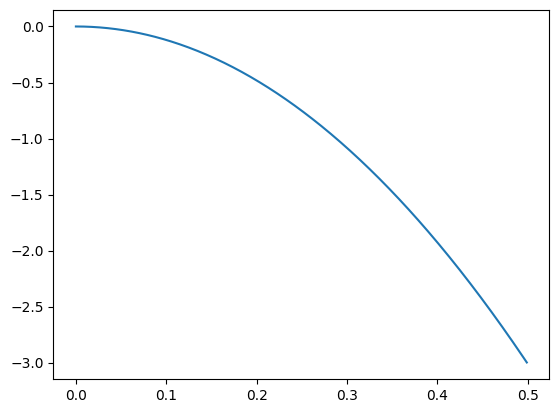

In [841]:
plt.plot(f/1e6,20*np.log10(abs(np.exp(-(alpha*f)**2))))

In [842]:
Nmax = (2**(32-1)-1)
Nmax
q = (np.log2(Nmax) - np.log2(hmax))
q//=2
q

np.float64(5.0)

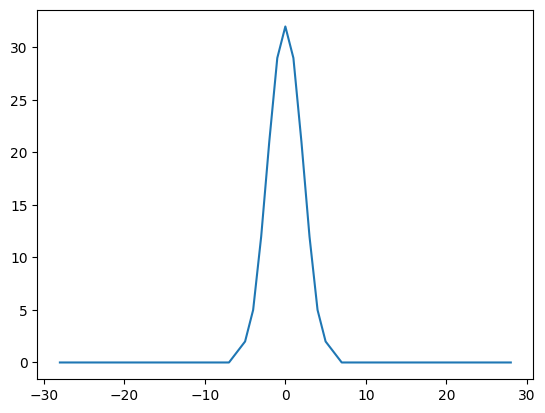

In [843]:
h_em_q14 = [int(np.round((h_discreto(k)/hmax)[i]*2**q)) for i in range (len(k))]
plt.plot(k,h_em_q14)

In [844]:
def int2comp2(val, nbits=32):
    return hex((val + (1 << nbits)) % (1 << nbits))

int2comp2(100)

'0x64'

In [845]:
def comp2int(val, nbits=32):
    val=int(val,16)
    if(val & 1 << nbits-1):
        return (~val+1)%(1<<nbits)*(-1)
    return val

In [846]:
file = open("coefs_ponto_fixo_q8.txt",'w+')
for i in range(len(h_em_q14)):
    print(int2comp2(h_em_q14[i])[2:])
    file.write(f'{int2comp2(h_em_q14[i])[2:]}\n')
file.close()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
5
c
15
1d
20
1d
15
c
5
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
